In [26]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tifffile
import cv2 as cv
from glob import glob
from tqdm import tqdm
import json

# data source

https://portal.hubmapconsortium.org/search?mapped_data_types[0]=PAS%20Stained%20Microscopy&entity_type[0]=Dataset



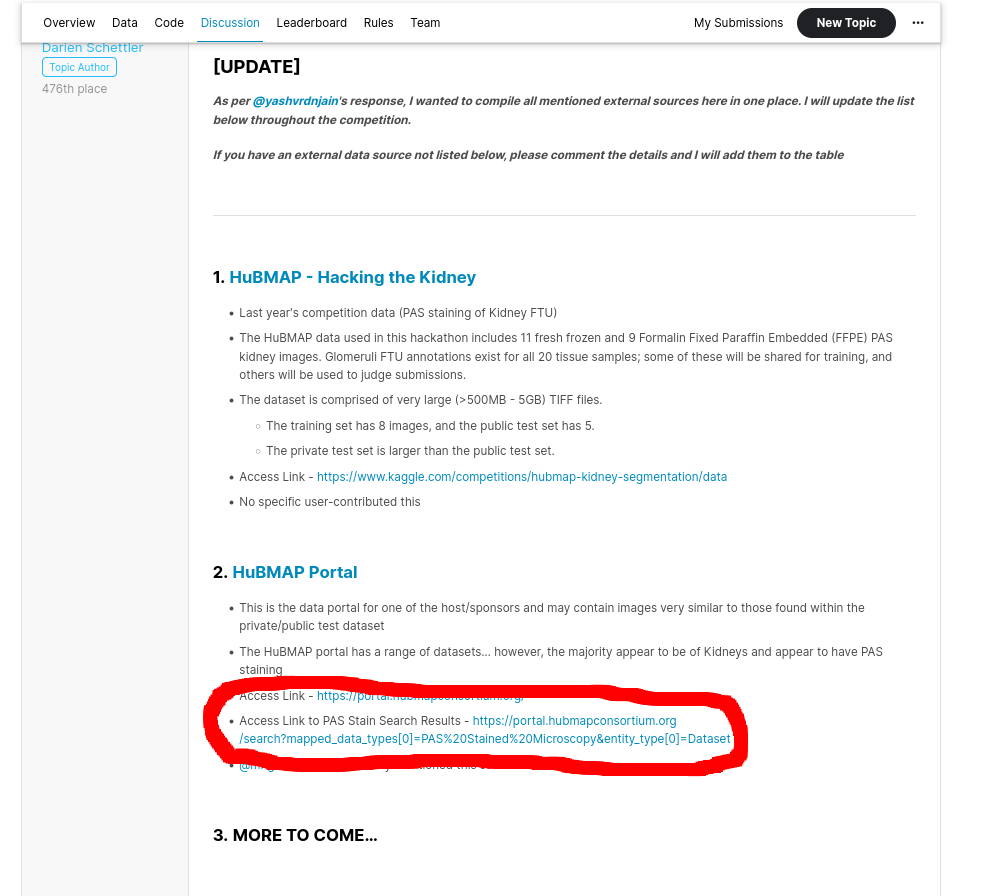

# images

In [3]:
mapping_uuid = pd.read_csv('./../other_data/kidney_HUBMAP/mapping.csv')

In [4]:
len(mapping_uuid)

46

In [5]:
mapping_uuid.head(3)

Unnamed: 0             subm_id                              uuid
0           0     VAN0006-LK-4-35  07317dfade92994d6fbbe9faef1236f7
1           1  VAN0014-LK-203-108  1e9b9d5ac57ac8bd4093f2503675a2cd
2           2  VAN0010-LK-152-162  b4c8ef4fdbc94b884e8f3251ac9143bd

In [6]:
def get_tiff_fname_by_uuid(uuid: str):
    slc = mapping_uuid[mapping_uuid['uuid'] == uuid]
    row = slc.iloc[0]
    subm_id = row['subm_id']
    
    fnames = glob('./../other_data/kidney_HUBMAP/{}*tif*'.format(subm_id))
    if len(fnames) == 1:
        return fnames[0]
    
    return None

In [7]:
get_tiff_fname_by_uuid('07317dfade92994d6fbbe9faef1236f7')

'./../other_data/kidney_HUBMAP/VAN0006-LK-4-35-PAS_IMS-registered.ome.tiff'

In [8]:
image_sizes = []

for uuid in tqdm(mapping_uuid['uuid']):
    try:
        fname = get_tiff_fname_by_uuid(uuid)

        image = tifffile.imread(fname)
        
        if len(image.shape) == 5: # иногда размерность 5 и перепутаны каналы
            image = np.squeeze(image)
            image = np.transpose(image, (1, 2, 0))
        
#         print(image.shape)

        image_sizes.append(image.shape[:2])

        resz = cv.resize(image, None, fx=0.02, fy=0.02)

        bname = os.path.splitext(os.path.basename(fname))[0] + '.png'

        out_name = './../other_data/kidney_HUBMAP/kidney_hubmap_compressed/{}'.format(bname)
    #     print(bname)

        cv.imwrite(out_name, resz[:, :, ::-1])
    except:
        print('fail', fname)
#     break

100%|██████████| 46/46 [03:38<00:00,  4.74s/it]


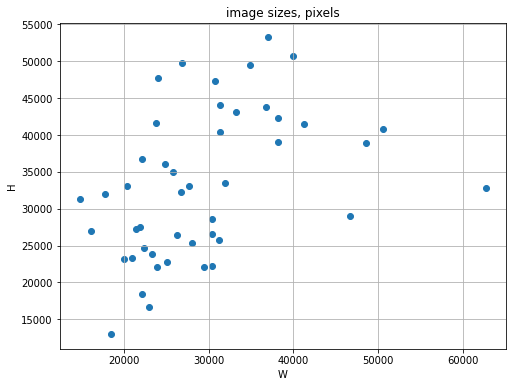

In [15]:
plt.figure(figsize=(8, 6))
plt.scatter(*zip(*image_sizes))
plt.grid()
plt.title('image sizes, pixels')
plt.xlabel('W')
plt.ylabel('H')
plt.show()

In [17]:
!tar -cvzf ../other_data/kidney_HUBMAP/kidney_hubmap_compressed.tar.gz ../other_data/kidney_HUBMAP/kidney_hubmap_compressed/*

tar: Removing leading `../' from member names
../other_data/kidney_HUBMAP/kidney_hubmap_compressed/VAN0003-LK-32-21-PAS_registered.ome.png
../other_data/kidney_HUBMAP/kidney_hubmap_compressed/VAN0003-LK-33-2-PAS_FFPE.ome.png
../other_data/kidney_HUBMAP/kidney_hubmap_compressed/VAN0005-RK-1-1-PAS_registered.ome.png
../other_data/kidney_HUBMAP/kidney_hubmap_compressed/VAN0005-RK-4-172-PAS_registered.ome.png
../other_data/kidney_HUBMAP/kidney_hubmap_compressed/VAN0005-RK-8-2-PAS_FFPE.ome.png
../other_data/kidney_HUBMAP/kidney_hubmap_compressed/VAN0006-LK-2-85-PAS_registered.ome.png
../other_data/kidney_HUBMAP/kidney_hubmap_compressed/VAN0006-LK-4-33-PAS-registered.ome.png
../other_data/kidney_HUBMAP/kidney_hubmap_compressed/VAN0006-LK-4-35-PAS_IMS-registered.ome.png
../other_data/kidney_HUBMAP/kidney_hubmap_compressed/VAN0006-LK-7-2-PAS_FFPE.ome.png
../other_data/kidney_HUBMAP/kidney_hubmap_compressed/VAN0007-LK-203-103-PAS_registered.ome.png
../other_data/kidney_HUBMAP/kidney_hubmap_comp

# samples of meat

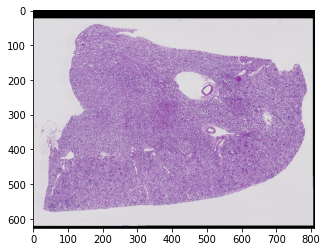

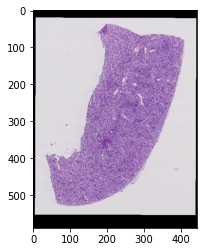

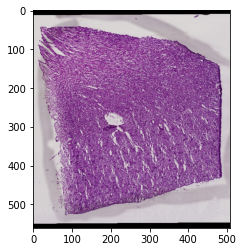

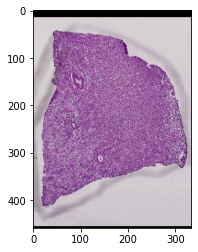

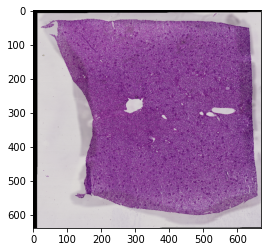

In [16]:
for fname in list(glob('./../other_data/kidney_HUBMAP/kidney_hubmap_compressed/*.png'))[:5]:
    img = cv.imread(fname)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()

# large scale parts of same image

In [31]:
fname = get_tiff_fname_by_uuid('07317dfade92994d6fbbe9faef1236f7')
image = tifffile.imread(fname)

In [38]:
image.shape

(24923, 36123, 3)

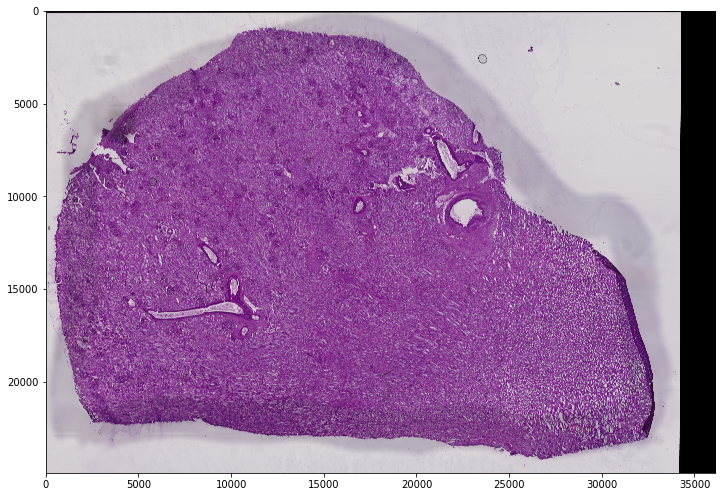

In [33]:
plt.figure(figsize=(12, 12))
plt.imshow(image)
plt.show()

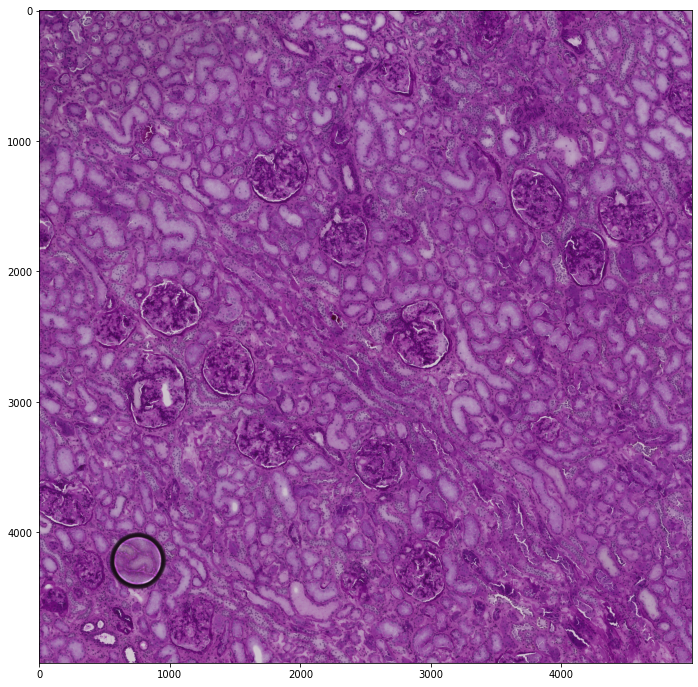

In [34]:
plt.figure(figsize=(12, 12))
plt.imshow(image[5000:10000, 5000:10000])
plt.show()

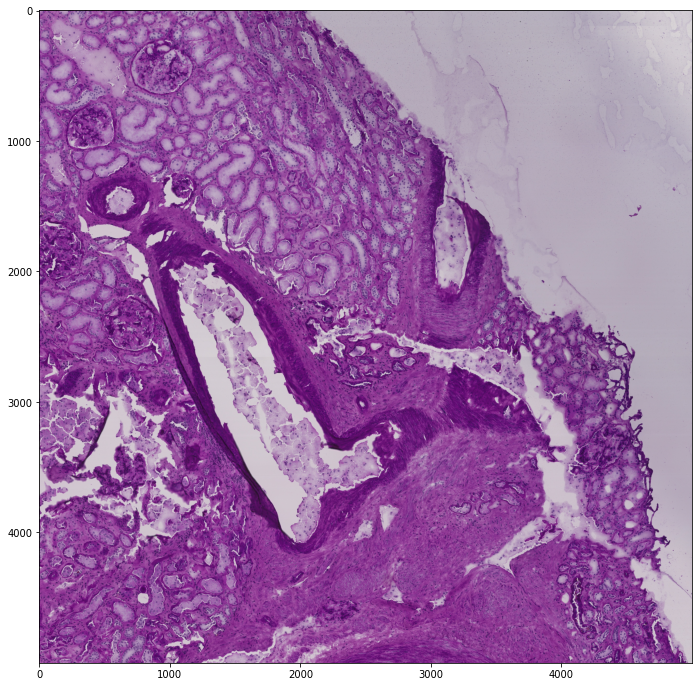

In [39]:
plt.figure(figsize=(12, 12))
plt.imshow(image[5000:10000, 20000:25000])
plt.show()

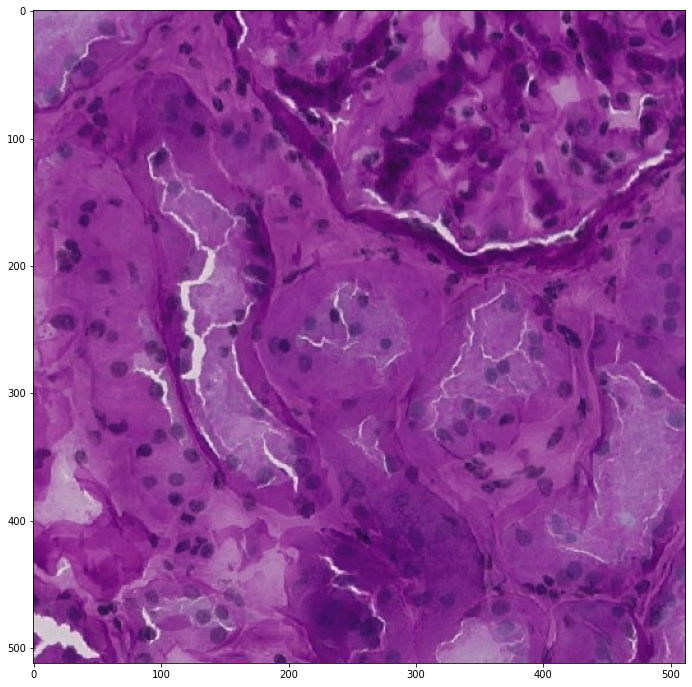

In [35]:
plt.figure(figsize=(12, 12))
plt.imshow(image[10000:10512, 10000:10512])
plt.show()

# annotations

In [22]:
meta = pd.read_csv('./../other_data/kidney_HUBMAP/hubmap-datasets-metadata-2022-07-30_09-37-48.tsv', sep='\t')
meta = meta.iloc[1:, :]

In [23]:
meta.head()

uuid        hubmap_id  \
1  07317dfade92994d6fbbe9faef1236f7  HBM969.MLWK.466   
2  1e9b9d5ac57ac8bd4093f2503675a2cd  HBM979.HDZH.896   
3  b4c8ef4fdbc94b884e8f3251ac9143bd  HBM649.DLZF.463   
4  5eacc268fa94d3419580ff04c9a9c76d  HBM874.RZDW.757   
5  7308530b92438fdbe258b501aeb86069  HBM227.THVC.544   

  acquisition_instrument_model acquisition_instrument_vendor    analyte_class  \
1                      SCN-400                        Leica   polysaccharides   
2                       SCN400              Leica Biosystems  polysaccharides   
3                      SCN-400                        Leica   polysaccharides   
4                       SCN400              Leica Biosystems  polysaccharides   
5                      SCN-400                        Leica   polysaccharides   

  assay_category      assay_type  \
1        imaging  PAS microscopy   
2        imaging  PAS microscopy   
3        imaging  PAS microscopy   
4        imaging  PAS microscopy   
5        imaging  PAS microscopy   

                                         description  donor.hubmap_id  \
1  Periodic acid-Schiff stained microscopy collec...  HBM525.JNPV.685   
2                                                NaN  HBM769.HVDR.369   
3  Periodic acid-Schiff stained microscopy collec...  HBM322.KQBK.747   
4                                                NaN  HBM679.GXQW.326   
5  Periodic acid-Schiff stained microscopy collec...  HBM226.XVDP.877   

  execution_datetime  ...                protocols_io_doi resolution_x_unit  \
1   2021-01-07 21:25  ...  10.17504/protocols.io.buaknscw                um   
2     12/17/19 16:42  ...   10.17504/protocols.io.4qngvve                nm   
3   2020-11-24 19:27  ...  10.17504/protocols.io.buaknscw                um   
4     11/20/19 15:51  ...   10.17504/protocols.io.4qngvve                nm   
5   2020-09-10 18:27  ...  10.17504/protocols.io.buaknscw                um   

  resolution_x_value resolution_y_unit resolution_y_value resolution_z_unit  \
1               0.65                um               0.65                um   
2                500                nm                500                nm   
3               0.65                um               0.65                um   
4                500                nm                500                nm   
5               0.65                um               0.65                um   

  resolution_z_value   section_prep_protocols_io_doi                 stain  \
1                  0  10.17504/protocols.io.bt8inrue  Periodic acid-Schiff   
2                  0   10.17504/protocols.io.4qngvve  Periodic acid-Schiff   
3                  0  10.17504/protocols.io.bt8inrue  Periodic acid-Schiff   
4                  0   10.17504/protocols.io.4qngvve  Periodic acid-Schiff   
5                  0  10.17504/protocols.io.bt8inrue  Periodic acid-Schiff   

                             thumbnail_file_abs_path  
1  /hive/hubmap/data/consortium/Vanderbilt TMC/07...  
2                                                NaN  
3                                                NaN  
4                                                NaN  
5                                                NaN  

[5 rows x 26 columns]

In [24]:
dict(meta.iloc[0])

{'uuid': '07317dfade92994d6fbbe9faef1236f7',
 'hubmap_id': 'HBM969.MLWK.466',
 'acquisition_instrument_model': 'SCN-400',
 'acquisition_instrument_vendor': 'Leica ',
 'analyte_class': 'polysaccharides',
 'assay_category': 'imaging',
 'assay_type': 'PAS microscopy',
 'description': 'Periodic acid-Schiff stained microscopy collected from the left kidney of a 58 year old African American male donor by the Biomolecular Multimodal Imaging Center (BIOMC) at Vanderbilt University. BIOMIC is a Tissue Mapping Center that is part of the NIH funded Human Biomolecular Atlas Program (HuBMAP). Brightfield microscopy images of fresh-frozen tissue sections were collected with a Leica BioSystems SCN-400. Support was provided by the NIH Common Fund and National Institute of Diabetes and Digestive and Kidney Diseases (U54 DK120058). Tissue was collected through the Cooperative Human Tissue Network with support provided by the NIH National Cancer Institute (5 UM1 CA183727-08).',
 'donor.hubmap_id': 'HBM52

# очень много инфы, хз зачем она может понадобиться

У каждого uuid изображения есть json файл, который выгружен с сайта 

https://portal.hubmapconsortium.org/search?mapped_data_types[0]=PAS%20Stained%20Microscopy&entity_type[0]=Dataset

Кажется, что все это не нужно, но на всякий случай пример одно json

In [29]:
more_meta_data = json.load(open('./../other_data/kidney_HUBMAP/07317dfade92994d6fbbe9faef1236f7.json'))

In [28]:
more_meta_data

{'anatomy_0': ['body'],
 'anatomy_1': ['kidney'],
 'anatomy_2': ['left kidney'],
 'ancestor_counts': {'entity_type': {'Donor': 1, 'Sample': 3}},
 'ancestor_ids': ['4131fa230cd783005c1a9d264ebe1c85',
  '5f8bd79354b14fc35466221b875bb030',
  '9aab342fbe6b4cc250c2ef4c2635523e',
  'dd258063b8389612a9596af734143906'],
 'ancestors': [{'created_by_user_displayname': 'Jamie Allen',
   'created_by_user_email': 'jamie.l.allen@vanderbilt.edu',
   'created_timestamp': 1605027778951,
   'data_access_level': 'public',
   'description': '07/02/20 : 1-15 - LCMS Section Amount Test\n09/21/20: 16-22 - LCMS Normal Optimization\n10/21/20: 23-44 - Data Release 2\n  28-32: LCMS, \n  33: PAS, \n  34: Codex, \n  35: IMS, \n  36: NanoString, \n  37: Codex, \n  38: IMS, \n  39: MXIF, \n  40: IMS, \n  41: IMS-CellDive, \n  42: CellDive, \n  43: IMS-CellDive, \n  44: CellDive, \n',
   'entity_type': 'Sample',
   'group_uuid': '73bb26e4-ed43-11e8-8f19-0a7c1eab007a',
   'hubmap_id': 'HBM363.MPPK.798',
   'last_modif

А еще надо поискать, мб есть еще какая-то разметка для этих же данных